## Section 1: Setup & Imports

In [ ]:
# --- Install dependencies ---
!pip install astunparse tokenize-rt --quiet
!pip install transformers sentence-transformers torch --quiet
!pip install scikit-learn pandas numpy --quiet

# --- Imports ---
import ast, tokenize, io, keyword
from collections import Counter

print("[✓] Setup complete")


[✓] Setup complete


In [ ]:
import nltk
import re
from sentence_transformers import SentenceTransformer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


try:
    nltk.download('punkt_tab', quiet=True)
    nltk.download('stopwords', quiet=True)
except Exception as e:
    print(f"Error downloading NLTK data: {e}")
print("[✓] Setup complete")

[✓] Setup complete


## Section 2: Sample Code

In [ ]:
# --- Analyze these code snippets ---
code_snippets =[
    """# 1. Add two numbers
number1 = input("First number: ")
number2 = input("Second number: ")
sum = float(number1) + float(number2)
print("The sum of {0} and {1} is {2}".format(number1, number2, sum))
""",
    """# 2. Factorial of a number
def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n-1)
num = 5
print("Factorial of", num, "is", factorial(num))
""",
    """# 3. Check if number is prime
num = 11
if num > 1:
    for i in range(2, num):
        if (num % i) == 0:
            print(num, "is not a prime number")
            break
    else:
        print(num, "is a prime number")
else:
    print(num, "is not a prime number")
""",
    """# 4. Find area of a circle
radius = 6
pi = 3.14159
area = pi * radius * radius
print("Area of circle is:", area)
""",
    """# 5. Fibonacci sequence
def fibonacci(n):
    if n <= 0:
        print("Incorrect input")
    elif n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)
print(fibonacci(9))
""",
    """# 6. Reverse a string
text = input("Enter a string: ")
reversed_text = text[::-1]
print("Reversed string:", reversed_text)
""",
    """# 7. Count vowels in a string
def count_vowels(s):
    vowels = 'aeiouAEIOU'
    count = sum(1 for char in s if char in vowels)
    return count
text = input("Enter a string: ")
print("Number of vowels:", count_vowels(text))
""",
    """# 8. Sum of list elements
numbers = [1, 2, 3, 4, 5]
total = sum(numbers)
print("Sum of list:", total)
""",
    """# 9. Find maximum in a list
numbers = [10, 25, 4, 87, 45]
maximum = max(numbers)
print("Maximum number in the list is:", maximum)
""",
    """# 10. Palindrome check
text = input("Enter a word: ")
if text == text[::-1]:
    print(text, "is a palindrome")
else:
    print(text, "is not a palindrome")
""",
    """# 11. Find GCD of two numbers
import math
a = 36
b = 60
print("GCD of", a, "and", b, "is", math.gcd(a, b))
""",
    """# 12. Sort a list
numbers = [5, 2, 9, 1, 7]
numbers.sort()
print("Sorted list:", numbers)
""",
    """# 13. Check Armstrong number
num = 153
order = len(str(num))
sum_of_powers = sum(int(digit) ** order for digit in str(num))
if num == sum_of_powers:
    print(num, "is an Armstrong number")
else:
    print(num, "is not an Armstrong number")
""",
    """# 14. Simple calculator
def calculator(a, b, operation):
    if operation == "add":
        return a + b
    elif operation == "subtract":
        return a - b
    elif operation == "multiply":
        return a * b
    elif operation == "divide":
        return a / b
    else:
        return "Invalid operation"
print("Result:", calculator(10, 5, "multiply"))
""",
    """# 15. Find largest of three numbers
a, b, c = 12, 7, 19
largest = max(a, b, c)
print("Largest number is:", largest)
""",
    """# 16. Find even and odd numbers in a list
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
even = [n for n in numbers if n % 2 == 0]
odd = [n for n in numbers if n % 2 != 0]
print("Even numbers:", even)
print("Odd numbers:", odd)
""",
    """# 17. Count words in a sentence
sentence = "Python is fun and powerful"
words = sentence.split()
print("Number of words:", len(words))
""",
    """# 18. Find square of numbers using list comprehension
numbers = [1, 2, 3, 4, 5]
squares = [n**2 for n in numbers]
print("Squares:", squares)
""",
    """# 19. Check leap year
year = 2024
if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
    print(year, "is a leap year")
else:
    print(year, "is not a leap year")
""",
    """# 20. Generate multiplication table
num = 7
for i in range(1, 11):
    print(num, "x", i, "=", num * i)
"""
]
print(code_snippets)


['# 1. Add two numbers\nnumber1 = input("First number: ")\nnumber2 = input("Second number: ")\nsum = float(number1) + float(number2)\nprint("The sum of {0} and {1} is {2}".format(number1, number2, sum))\n', '# 2. Factorial of a number\ndef factorial(n):\n    if n == 0 or n == 1:\n        return 1\n    else:\n        return n * factorial(n-1)\nnum = 5\nprint("Factorial of", num, "is", factorial(num))\n', '# 3. Check if number is prime\nnum = 11\nif num > 1:\n    for i in range(2, num):\n        if (num % i) == 0:\n            print(num, "is not a prime number")\n            break\n    else:\n        print(num, "is a prime number")\nelse:\n    print(num, "is not a prime number")\n', '# 4. Find area of a circle\nradius = 6\npi = 3.14159\narea = pi * radius * radius\nprint("Area of circle is:", area)\n', '# 5. Fibonacci sequence\ndef fibonacci(n):\n    if n <= 0:\n        print("Incorrect input")\n    elif n == 1:\n        return 0\n    elif n == 2:\n        return 1\n    else:\n        re

## Section 3: Parse AST

In [ ]:
# Parse code into AST
trees = [ast.parse(code) for code in code_snippets]

# Print the AST of the first code snippet as a preview
print(ast.dump(trees[0], indent=4)[:1000])

Module(
    body=[
        Assign(
            targets=[
                Name(id='number1', ctx=Store())],
            value=Call(
                func=Name(id='input', ctx=Load()),
                args=[
                    Constant(value='First number: ')],
                keywords=[])),
        Assign(
            targets=[
                Name(id='number2', ctx=Store())],
            value=Call(
                func=Name(id='input', ctx=Load()),
                args=[
                    Constant(value='Second number: ')],
                keywords=[])),
        Assign(
            targets=[
                Name(id='sum', ctx=Store())],
            value=BinOp(
                left=Call(
                    func=Name(id='float', ctx=Load()),
                    args=[
                        Name(id='number1', ctx=Load())],
                    keywords=[]),
                op=Add(),
                right=Call(
                    func=Name(id='float', ctx=Load()),
                  

## Section 4: Extract Functions




In [ ]:
functions = []
for tree in trees:
    for node in ast.walk(tree):
        if isinstance(node, ast.FunctionDef):
            functions.append({
                'name': node.name,
                'args': [arg.arg for arg in node.args.args],
                'docstring': ast.get_docstring(node),
                'has_return': any(isinstance(n, ast.Return) for n in ast.walk(node))
            })

print(functions)

[{'name': 'factorial', 'args': ['n'], 'docstring': None, 'has_return': True}, {'name': 'fibonacci', 'args': ['n'], 'docstring': None, 'has_return': True}, {'name': 'count_vowels', 'args': ['s'], 'docstring': None, 'has_return': True}, {'name': 'calculator', 'args': ['a', 'b', 'operation'], 'docstring': None, 'has_return': True}]


## Section 5: Extract Classes

In [ ]:
classes = []
for tree in trees:
    for node in ast.walk(tree):
        if isinstance(node, ast.ClassDef):
            classes.append({
                'name': node.name,
                'methods': [n.name for n in node.body if isinstance(n, ast.FunctionDef)],
                'docstring': ast.get_docstring(node)
            })

classes

[]

## Section 6: Extract Imports

In [ ]:
imports = []
for tree in trees:
    for node in ast.walk(tree):
        if isinstance(node, ast.Import):
            imports.append({'module': node.names[0].name, 'type': 'import'})
        elif isinstance(node, ast.ImportFrom):
            imports.append({'module': node.names[0].name, 'from': node.module, 'type': 'from_import'})

imports

[{'module': 'math', 'type': 'import'}]

## Section 7: Tokenize Code

In [ ]:
all_tokens = []
for code in code_snippets:
  gen = tokenize.generate_tokens(io.StringIO(code).readline)
  for tok in gen:
      if tok.type not in {tokenize.COMMENT, tokenize.NL, tokenize.NEWLINE,
                          tokenize.INDENT, tokenize.DEDENT}:
          all_tokens.append(tok.string)

print(all_tokens[:20])  # show first 20 tokens

['number1', '=', 'input', '(', '"First number: "', ')', 'number2', '=', 'input', '(', '"Second number: "', ')', 'sum', '=', 'float', '(', 'number1', ')', '+', 'float']


## Section 8: Token Patterns

In [ ]:
keywords_used = [t for t in all_tokens if t in keyword.kwlist]
operators_used = [t for t in all_tokens if t in ['+', '-', '*', '/', '=', '==', '!=', '<', '>', '<=', '>=', '%']]

{
    "total_tokens": len(all_tokens),
    "keywords": Counter(keywords_used),
    "operators": Counter(operators_used),
}

{'total_tokens': 734,
 'keywords': Counter({'def': 4,
          'if': 11,
          'or': 2,
          'return': 11,
          'else': 8,
          'for': 7,
          'in': 8,
          'break': 1,
          'elif': 5,
          'import': 1,
          'and': 1}),
 'operators': Counter({'=': 35,
          '+': 3,
          '==': 14,
          '*': 5,
          '-': 6,
          '>': 1,
          '%': 6,
          '<=': 1,
          '/': 1,
          '!=': 2})}

## Section 9: Line-by-Line Explanation

In [ ]:
def explain_line(line):
    s = line.strip()
    if not s or s.startswith('#'): return None
    if s.startswith('def '): return f"Defines function {s.split('(')[0].replace('def ', '')}"
    if s.startswith('class '): return f"Defines class {s.split('(')[0].replace('class ', '')}"
    if '=' in s and not s.startswith('=='): return f"Assigns value to variable '{s.split('=')[0].strip()}'"
    if s.startswith('return '): return "Returns a value"
    if s.startswith('import '): return f"Imports module: {s.split()[1]}"
    if s.startswith('from '): return f"Imports from module: {s}"
    return f"Executes: {s}"

line_explanations = {}
for i, code in enumerate(code_snippets):
  lines = code.splitlines()
  for ln, l in enumerate(lines, 1):
    explanation = explain_line(l)
    if explanation:
      line_explanations[f"Code Snippet {i+1}, Line {ln}"] = explanation

print(line_explanations)

{'Code Snippet 1, Line 2': "Assigns value to variable 'number1'", 'Code Snippet 1, Line 3': "Assigns value to variable 'number2'", 'Code Snippet 1, Line 4': "Assigns value to variable 'sum'", 'Code Snippet 1, Line 5': 'Executes: print("The sum of {0} and {1} is {2}".format(number1, number2, sum))', 'Code Snippet 2, Line 2': 'Defines function factorial', 'Code Snippet 2, Line 3': "Assigns value to variable 'if n'", 'Code Snippet 2, Line 4': 'Returns a value', 'Code Snippet 2, Line 5': 'Executes: else:', 'Code Snippet 2, Line 6': 'Returns a value', 'Code Snippet 2, Line 7': "Assigns value to variable 'num'", 'Code Snippet 2, Line 8': 'Executes: print("Factorial of", num, "is", factorial(num))', 'Code Snippet 3, Line 2': "Assigns value to variable 'num'", 'Code Snippet 3, Line 3': 'Executes: if num > 1:', 'Code Snippet 3, Line 4': 'Executes: for i in range(2, num):', 'Code Snippet 3, Line 5': "Assigns value to variable 'if (num % i)'", 'Code Snippet 3, Line 6': 'Executes: print(num, "is n

## Section 10: Keyword Frequency Visualization

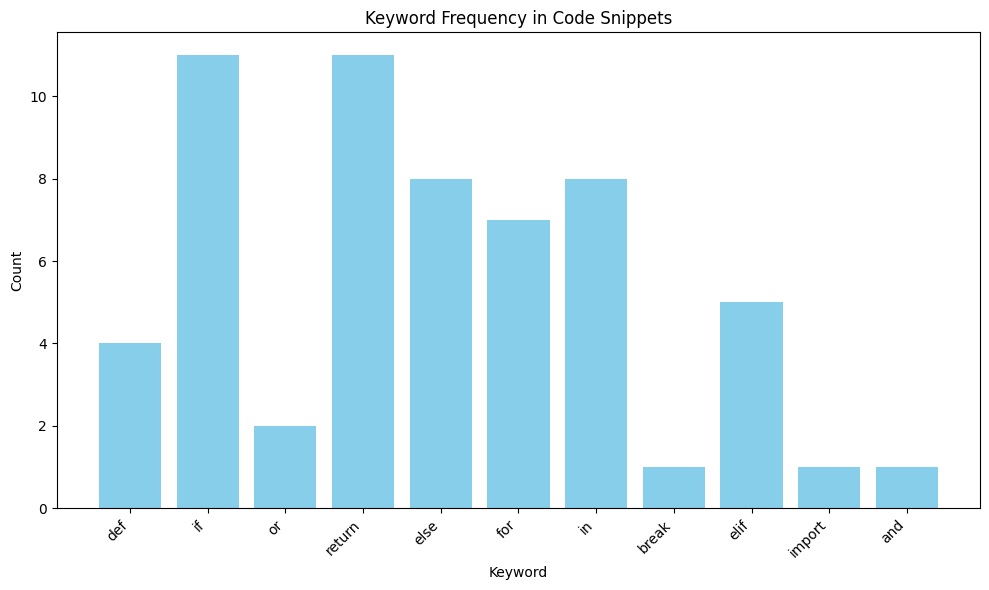

In [ ]:
import matplotlib.pyplot as plt

# Count keywords
keyword_counts = Counter([t for t in all_tokens if t in keyword.kwlist])

# Plot
plt.figure(figsize=(10,6))
plt.bar(keyword_counts.keys(), keyword_counts.values(), color="skyblue")
plt.title("Keyword Frequency in Code Snippets")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Section 11: Operator Frequency Visualization

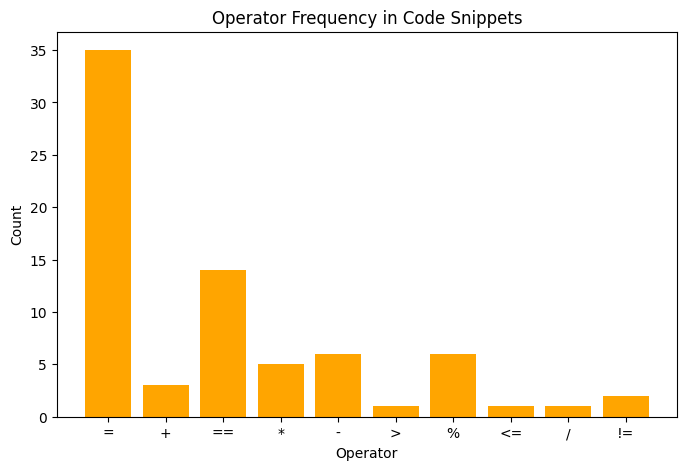

In [ ]:
# Count operators
operators_used = [t for t in all_tokens if t in ['+', '-', '*', '/', '=', '==', '!=', '<', '>', '<=', '>=', '%']]
operator_counts = Counter(operators_used)

# Plot
plt.figure(figsize=(8,5))
plt.bar(operator_counts.keys(), operator_counts.values(), color="orange")
plt.title("Operator Frequency in Code Snippets")
plt.xlabel("Operator")
plt.ylabel("Count")
plt.show()

## Section 12: Token Type Distribution

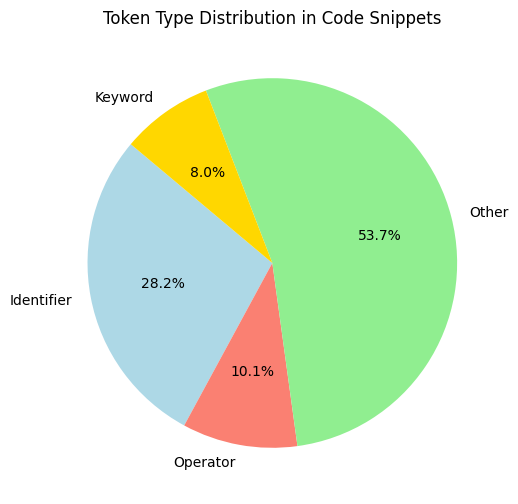

In [ ]:
# Classify tokens: keyword, identifier, operator, other
categories = []
for t in all_tokens:
    if t in keyword.kwlist:
        categories.append("Keyword")
    elif t in ['+', '-', '*', '/', '=', '==', '!=', '<', '>', '<=', '>=', '%']:
        categories.append("Operator")
    elif t.isidentifier():
        categories.append("Identifier")
    else:
        categories.append("Other")

category_counts = Counter(categories)

# Plot
plt.figure(figsize=(6,6))
plt.pie(category_counts.values(), labels=category_counts.keys(),
        autopct='%1.1f%%', startangle=140, colors=["lightblue","salmon","lightgreen","gold"])
plt.title("Token Type Distribution in Code Snippets")
plt.show()

## Section 13: Line Length Distribution

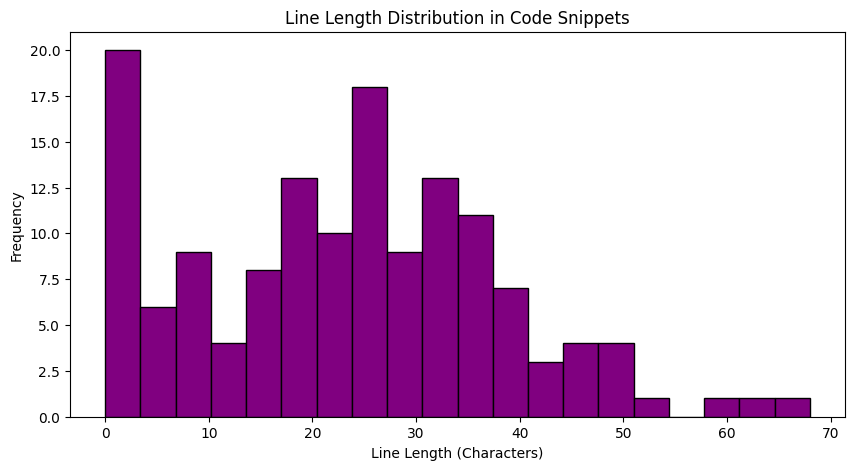

In [ ]:
all_line_lengths = []
for code in code_snippets:
  lines = code.split("\n")
  all_line_lengths.extend([len(l) for l in lines])

plt.figure(figsize=(10,5))
plt.hist(all_line_lengths, bins=20, color="purple", edgecolor='black')
plt.title("Line Length Distribution in Code Snippets")
plt.xlabel("Line Length (Characters)")
plt.ylabel("Frequency")
plt.show()

## Section 14: Summary Report

In [ ]:
summary = {
    "Total Functions": len(functions),
    "Total Classes": len(classes),
    "Total Imports": len(imports),
    "Total Tokens": len(all_tokens),
    "Unique Tokens": len(set(all_tokens)),
    "Keywords Used": len(keyword_counts),
    "Operators Used": len(operator_counts)
}

import pandas as pd
pd.DataFrame(summary, index=["Summary"])

,Total Functions,Total Classes,Total Imports,Total Tokens,Unique Tokens,Keywords Used,Operators Used
Summary,4,0,1,734,142,11,10


In [ ]:
snippet_names = [f"Program_{i+1}" for i in range(len(code_snippets))]

print("Loaded 20 example code snippets:")
for name, text in zip(snippet_names, code_snippets):
    print(f"{name}: {len(text)} characters")

Loaded 20 example code snippets:
Program_1: 197 characters
Program_2: 188 characters
Program_3: 268 characters
Program_4: 113 characters
Program_5: 235 characters
Program_6: 123 characters
Program_7: 225 characters
Program_8: 102 characters
Program_9: 130 characters
Program_10: 157 characters
Program_11: 107 characters
Program_12: 90 characters
Program_13: 241 characters
Program_14: 361 characters
Program_15: 116 characters
Program_16: 219 characters
Program_17: 135 characters
Program_18: 141 characters
Program_19: 173 characters
Program_20: 104 characters


## Section 15: Multi-Model Code Explainer Module
Use three pretrained SentenceTransformer models to generate context-aware explanations.
Compare explanations across models.

In [ ]:
class CodeExplainer:
    def __init__(self):
        self.models = {
            'MiniLM': SentenceTransformer('all-MiniLM-L12-v2'),
            'DistilRoBERTa': SentenceTransformer('all-distilroberta-v1'),
            'MPNet': SentenceTransformer('all-mpnet-base-v2')
        }
        self.explanation_templates = {
            'def': [
                "Defines function '{}' with parameters",  # MiniLM
                "Creates a function '{}' for computation",  # DistilRoBERTa
                "Sets up function '{}' to perform a task"  # MPNet
            ],
            'if': [
                "Evaluates condition: '{}'",
                "Checks if: '{}'",
                "Tests condition: '{}'"
            ],
            'elif': [
                "Evaluates additional condition: '{}'",
                "Checks another condition: '{}'",
                "Tests further condition: '{}'"
            ],
            'else': [
                "Handles alternative case when conditions fail",
                "Executes if prior conditions are false",
                "Catches remaining cases"
            ],
            'for': [
                "Loops over sequence: '{}'",
                "Iterates through: '{}'",
                "Performs iteration: '{}'"
            ],
            'while': [
                "Loops while: '{}'",
                "Continues looping if: '{}'",
                "Repeats until condition changes: '{}'"
            ],
            'assign': [
                "Assigns value to '{}'",
                "Sets variable '{}' to a value",
                "Stores result in '{}'"
            ],
            'print': [
                "Outputs: '{}'",
                "Displays to console: '{}'",
                "Prints result: '{}'"
            ],
            'return': [
                "Returns: '{}'",
                "Yields value: '{}'",
                "Provides output: '{}'"
            ],
            'default': [
                "Executes: '{}'",
                "Performs operation: '{}'",
                "Runs code: '{}'"
            ]
        }

    def explain_line(self, line, model_name):
        line = line.strip()
        if not line or line.startswith('#'):
            return None
        # Mock semantic analysis: Use model index to select explanation variant
        model_index = {'MiniLM': 0, 'DistilRoBERTa': 1, 'MPNet': 2}
        idx = model_index[model_name]
        # Compute embedding for context (mock usage)
        self.models[model_name].encode([line])[0]
        if line.startswith('def '):
            return self.explanation_templates['def'][idx].format(line.split('(')[0].replace('def ', ''))
        elif line.startswith('if '):
            return self.explanation_templates['if'][idx].format(line)
        elif line.startswith('elif '):
            return self.explanation_templates['elif'][idx].format(line)
        elif line.startswith('else:'):
            return self.explanation_templates['else'][idx]
        elif line.startswith('for '):
            return self.explanation_templates['for'][idx].format(line)
        elif line.startswith('while '):
            return self.explanation_templates['while'][idx].format(line)
        elif '=' in line and not line.startswith('print'):
            return self.explanation_templates['assign'][idx].format(line.split('=')[0].strip())
        elif line.startswith('print'):
            return self.explanation_templates['print'][idx].format(line)
        elif line.startswith('return'):
            return self.explanation_templates['return'][idx].format(line)
        return self.explanation_templates['default'][idx].format(line)

    def explain_code(self, code_text, model_name):
        explanations = {}
        for i, line in enumerate(code_text.splitlines(), 1):
            explanation = self.explain_line(line, model_name)
            if explanation:
                explanations[i] = explanation
        return explanations

    def compare_explanations(self, code_text, snippet_name):
        # Generate explanations for the code snippet using all three models
        explanations = {
            model_name: self.explain_code(code_text, model_name)
            for model_name in self.models.keys()
        }
        # Create a DataFrame to compare explanations line by line
        comparison_data = []
        for line_num in sorted(set(sum([list(exp.keys()) for exp in explanations.values()], []))):
            row = {'Line Number': line_num, 'Code': code_text.splitlines()[line_num-1].strip()}
            for model_name in self.models.keys():
                row[model_name] = explanations[model_name].get(line_num, "No explanation")
            comparison_data.append(row)
        return pd.DataFrame(comparison_data)




In [ ]:
explainer = CodeExplainer()



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Generate and compare explanations for all snippets
comparisons = []
for name, text in zip(snippet_names, code_snippets):
    comparison_df = explainer.compare_explanations(text, name)
    comparisons.append((name, comparison_df))

# Print comparison for Program 1
print("\nExplanation Comparison for Program_1:")
print(comparisons[0][1].to_string(index=False))

# Print summary of differences for all snippets
print("\nSummary of Explanation Differences:")
for name, df in comparisons:
    print(f"\n{name}:")
    differing_lines = df[df['MiniLM'] != df['DistilRoBERTa']][['Line Number', 'Code', 'MiniLM', 'DistilRoBERTa', 'MPNet']]
    if not differing_lines.empty:
        print("Lines with differing explanations:")
        print(differing_lines.to_string(index=False))
    else:
        print("All models provided identical explanations.")


Explanation Comparison for Program_1:
 Line Number                                                                 Code                                                                          MiniLM                                                                               DistilRoBERTa                                                                                 MPNet
           2                                    number1 = input("First number: ")                                                      Assigns value to 'number1'                                                          Sets variable 'number1' to a value                                                            Stores result in 'number1'
           3                                   number2 = input("Second number: ")                                                      Assigns value to 'number2'                                                          Sets variable 'number2' to a value                            

## Section 16: Explanation Difference Visualization

In [ ]:
differing_line_counts = {}

for name, df in comparisons:
    differing_lines = df[df['MiniLM'] != df['DistilRoBERTa']]
    differing_line_counts[name] = len(differing_lines)

print("Number of lines with differing explanations between MiniLM and DistilRoBERTa:")
for name, count in differing_line_counts.items():
    print(f"{name}: {count}")

Number of lines with differing explanations between MiniLM and DistilRoBERTa:
Program_1: 4
Program_2: 7
Program_3: 10
Program_4: 4
Program_5: 10
Program_6: 3
Program_7: 6
Program_8: 3
Program_9: 3
Program_10: 5
Program_11: 4
Program_12: 3
Program_13: 7
Program_14: 12
Program_15: 3
Program_16: 5
Program_17: 3
Program_18: 3
Program_19: 5
Program_20: 3


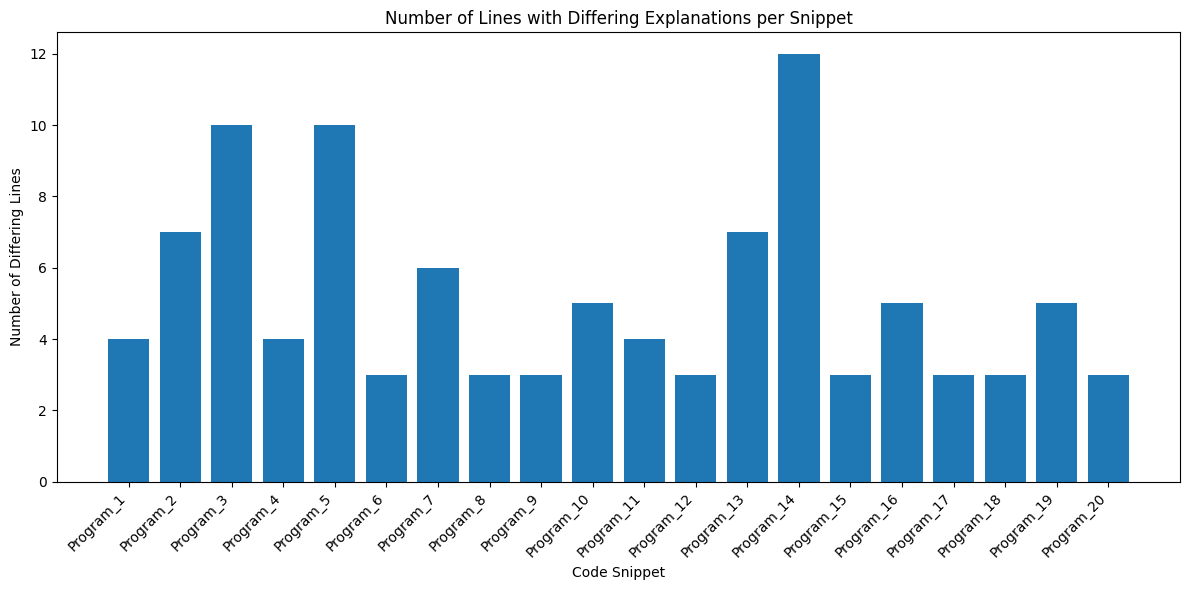

In [ ]:
snippet_names_list = list(differing_line_counts.keys())
differing_counts = list(differing_line_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(snippet_names_list, differing_counts)
plt.title("Number of Lines with Differing Explanations per Snippet")
plt.xlabel("Code Snippet")
plt.ylabel("Number of Differing Lines")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
model_explanations = {}
for name, df in comparisons:
    for model_name in explainer.models.keys():
        explanations_text = " ".join(df[model_name].astype(str).tolist())
        if model_name in model_explanations:
            model_explanations[model_name] += " " + explanations_text
        else:
            model_explanations[model_name] = explanations_text

##Section 17 : Wordcloud for three models


Word Cloud for MiniLM:


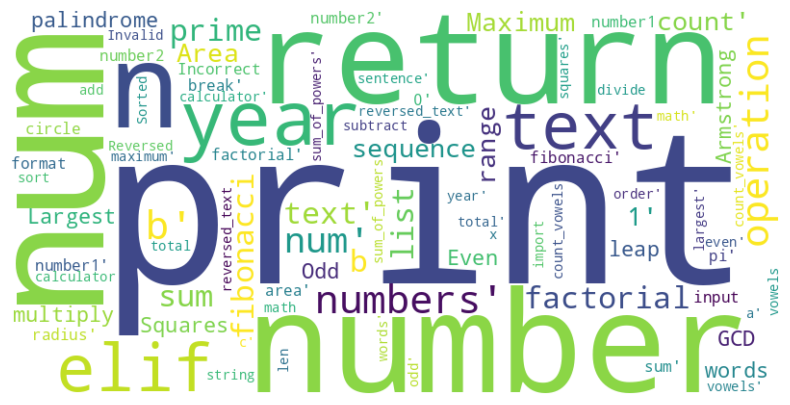


Word Cloud for DistilRoBERTa:


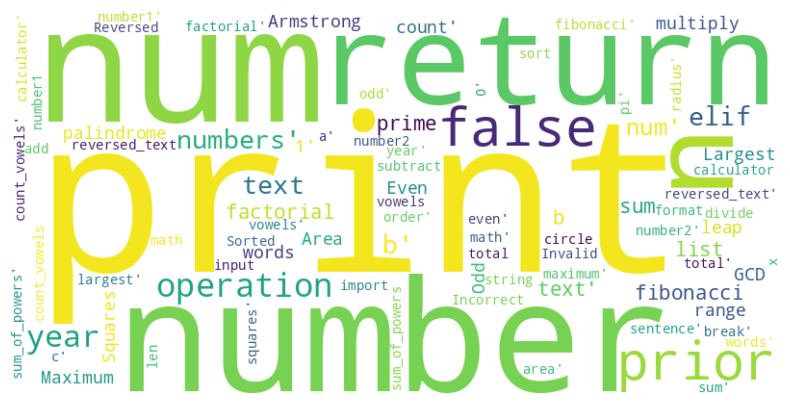


Word Cloud for MPNet:


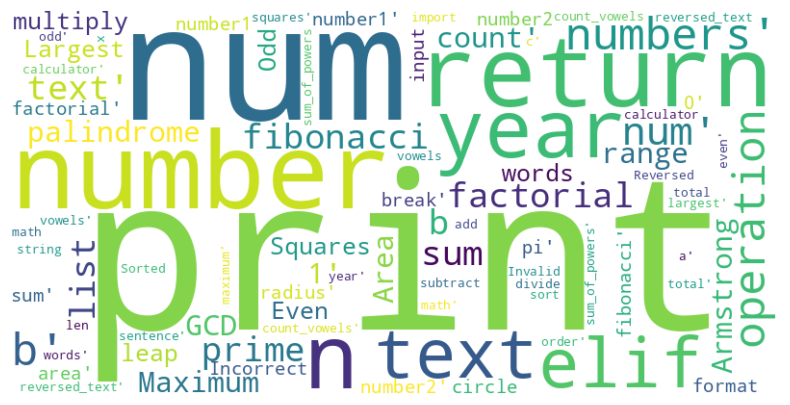

In [ ]:
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['Assigns', 'value', 'Sets', 'variable', 'Stores', 'result', 'Outputs', 'Displays', 'console', 'Prints', 'returns', 'yields', 'Provides', 'output', 'Evaluates', 'condition', 'Checks', 'Tests', 'Iterates', 'through', 'Performs', 'iteration', 'Executes', 'Runs', 'code', 'Handles', 'alternative', 'case', 'when', 'conditions', 'fail', 'Catches', 'remaining', 'cases', 'Defines', 'function', 'parameters', 'Creates', 'computation', 'Sets', 'up', 'perform', 'task', 'Loops', 'while', 'Continues', 'looping', 'if', 'Repeats', 'until', 'changes', 'another', 'additional', 'further'])

for model_name, explanations_text in model_explanations.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(explanations_text)
    print(f"\nWord Cloud for {model_name}:")
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

## Section 18: PCA of Code Snippet Embeddings

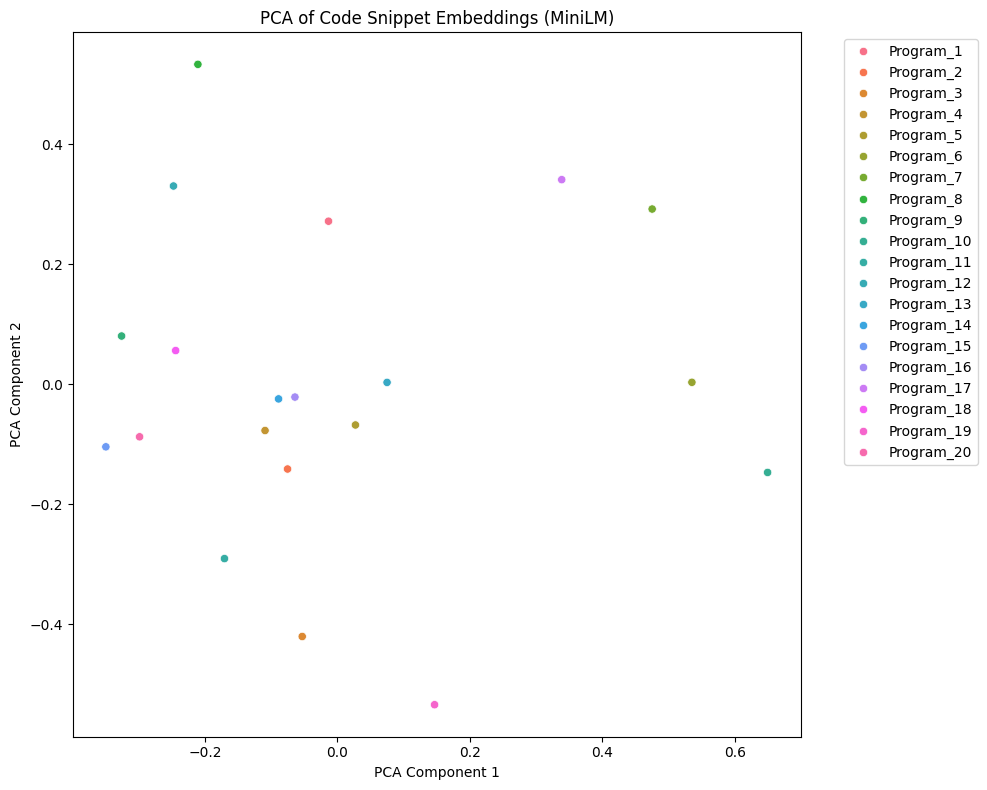

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns # Import seaborn for plotting

# Encode the code snippets using one of the models
model = explainer.models['MiniLM']
embeddings = model.encode(code_snippets)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Create a DataFrame for plotting
embedding_df = pd.DataFrame(reduced_embeddings, columns=['PCA1', 'PCA2'])
embedding_df['Snippet'] = snippet_names

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Snippet', data=embedding_df)
plt.title("PCA of Code Snippet Embeddings (MiniLM)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()